In [28]:
#!/usr/bin/env python
from sqlalchemy import create_engine, MetaData, Table

# Create the engine to connect to the SQLite database
engine = create_engine('sqlite:///world.sqlite')

# Connect to the database
conn = engine.connect()

# Read the metadata from the existing database
DBInfo = MetaData(engine)

# Auto-create the country object based on the metadata
country = Table('country', DBInfo, autoload_with=engine)

# Print out the columns to see what's available
print([col.name for col in country.columns])




['Code', 'Name', 'Continent', 'Region', 'SurfaceArea', 'IndepYear', 'Population', 'LifeExpectancy', 'GNP', 'GNPOld', 'LocalName', 'GovernmentForm', 'HeadOfState', 'Capital', 'Code2']


In [29]:
from sqlalchemy import create_engine, MetaData, Table, select

# Connect to the SQLite database
#engine = create_engine('sqlite:////blue/bsc4452/share/Class_Files/data/world.sqlite')
#conn = engine.connect()

# Load metadata and reflect the 'country' table
metadata = MetaData()
metadata.reflect(bind=engine)
country = metadata.tables.get('country')

# Query to find the Name with the most recent independence year
query = select([country.c.Name])  # Wrap in a list to make it iterable
query = query.where(country.c.IndepYear != None)  # Exclude NULL values from IndepYear
query = query.order_by(country.c.IndepYear.desc())  # Sort by most recent year of independence
query = query.limit(1)  # Limit to the most recent result

# Execute the query and fetch the result
result = conn.execute(query).fetchone()

# Output the result
if result:
    print(f"The country with the latest independence year is {result.Name}.")
else:
    print("No independence data available.")


The country with the latest independence year is South Sudan.


In [30]:
#!/usr/bin/env python
from sqlalchemy import create_engine, MetaData, Table, insert

# Create the engine to connect to the SQLite database
#engine = create_engine('sqlite:////blue/bsc4452/share/Class_Files/data/world.sqlite')

# Connect to the database
#conn = engine.connect()

# Read the metadata from the existing database
DBInfo = MetaData(engine)

# Auto-create the country object based on the metadata
country = Table('country', DBInfo, autoload_with=engine)

# Data for South Sudan
south_sudan_data = {
    'Code': 'SSD',
    'Name': 'South Sudan',
    'Continent': 'Africa',
    'Region': 'Eastern Africa',
    'SurfaceArea': 619745,
    'IndepYear': 2011,
    'Population': 10000000,
    'LifeExpectancy': None,  # Replace with actual value if available
    'GNP': None,  # Replace with actual value if available
    'GNPOld': None,  # Replace with actual value if available
    'LocalName': 'South Sudan',
    'GovernmentForm': 'Republic',
    'HeadOfState': 'Salva Kiir Mayardit',  # Replace if outdated
    'Capital': 'Juba',  # Replace with actual ID or name
    'Code2': 'SS'
}

# Insert the data into the table
try:
    # Create an insert statement
    stmt = insert(country).values(**south_sudan_data)
    conn.execute(stmt)
    print("South Sudan data inserted successfully.")
except Exception as e:
    print(f"Error during insertion: {e}")
finally:
    conn.close()


Error during insertion: (sqlite3.IntegrityError) UNIQUE constraint failed: country.Code
[SQL: INSERT INTO country ("Code", "Name", "Continent", "Region", "SurfaceArea", "IndepYear", "Population", "LifeExpectancy", "GNP", "GNPOld", "LocalName", "GovernmentForm", "HeadOfState", "Capital", "Code2") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)]
[parameters: ('SSD', 'South Sudan', 'Africa', 'Eastern Africa', 619745.0, 2011, 10000000, None, None, None, 'South Sudan', 'Republic', 'Salva Kiir Mayardit', 'Juba', 'SS')]
(Background on this error at: http://sqlalche.me/e/13/gkpj)


In [27]:
from sqlalchemy import create_engine, MetaData, Table, insert

# Create the engine to connect to the SQLite database
engine = create_engine('sqlite:///world.sqlite')

# Connect to the database
conn = engine.connect()

# Read the metadata from the existing database
DBInfo = MetaData(engine)

# Auto-create the country table object based on the metadata
city = Table('city', DBInfo, autoload_with=engine)


# Assuming we know the ID for South Sudan (e.g., ID = 10, the Code or primary key)
south_sudan_id = 10  # Replace with the actual ID or code of South Sudan in the country table

# Insert new data for Juba
juba_data = {
    'Name': 'Juba',
    'CountryCode': 'SSD',  # Assuming 'SSD' as the code for South Sudan (can vary based on schema)
    'Population': 500000,  # Population for Juba
   
}

# Insert new data for Wau
wau_data = {
    'Name': 'Wau',
    'CountryCode': 'SSD',  # Assuming 'SSD' as the code for South Sudan
    'Population': 350000,  # Population for Wau

}

try:
    # Insert statements for Juba and Wau
    insert_stmt_juba = insert(city).values(juba_data)
    insert_stmt_wau = insert(city).values(wau_data)

    # Execute the insert statements
    conn.execute(insert_stmt_juba)
    conn.execute(insert_stmt_wau)

    # Commit the transaction
    # conn.commit()

except Exception as e:
    # Print the error message if something goes wrong
    print(f"Error occurred during insertion: {e}")

finally:
    # Close the connection
    conn.close()


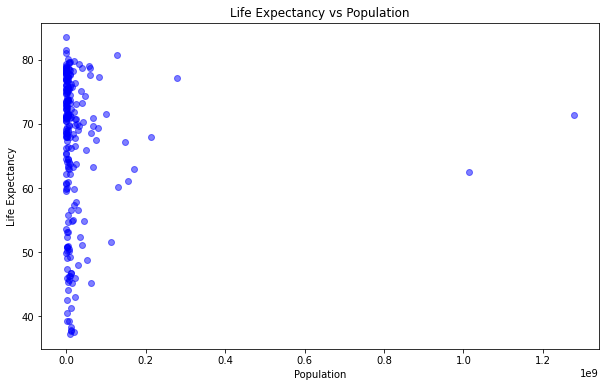

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine, MetaData, Table

# Create the engine to connect to the SQLite database
engine = create_engine('sqlite:////blue/bsc4452/share/Class_Files/data/world.sqlite')

# Connect to the database
conn = engine.connect()

# Read the metadata from the existing database
DBInfo = MetaData(engine)

# Auto-create the country table object based on the metadata
country = Table('country', DBInfo, autoload_with=engine)

# Select the required columns (LifeExpectancy, Population)
query = country.select().with_only_columns([country.c.LifeExpectancy, country.c.Population])

# Execute the query and fetch the results
results = conn.execute(query).fetchall()

# Convert the results to a pandas DataFrame
df = pd.DataFrame(results, columns=['LifeExpectancy', 'Population'])

# Close the connection
conn.close()

# Drop rows with missing LifeExpectancy or Population data (optional)
df = df.dropna()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Population'], df['LifeExpectancy'], alpha=0.5, color='b')

# Adding labels and title
plt.title('Life Expectancy vs Population')
plt.xlabel('Population')
plt.ylabel('Life Expectancy')

# Show the plot
plt.show()